In [67]:
from datetime import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.font_manager
import pandas as pd
import openpyxl
import os

%matplotlib inline

def write_csv(df, path):
    df.to_csv(path, index=True, header=True)
    
def open_csv(path):
    return pd.read_csv(path)

def open_json(path):
    return json.load(open(path))

def get_date():
    return str(dt.now().strftime("%Y-%m-%d")) #-%H-%M-%S

def save_map(m):
    m.save(f"{output_path}\map.html")

def save_plot(plt, direction):
    return "Image saved" if plt.savefig(f'{output_path}\\{direction}barplot_{get_date()}.png', dpi=1200, bbox_inches='tight') else None

def set_output(folder):
    if not os.path.isdir(folder):
        os.mkdir(folder)
        return True
    
    
# import import_ipynb
# from imports import *

output_path = f'output/brahiam'
set_output(output_path)
geojson_path = 'maps/world/world-administrative-boundaries.geojson'
save_path = f'{output_path}/countries_imports_activities.csv'

In [5]:
# Reading
path = 'raw_data/Perfil_EmpresasImpo_2022_WEB.xlsx'
df = pd.read_excel(path, engine='openpyxl')

In [72]:
act = pd.DataFrame(df['Actividad_agrupada'].value_counts())
act

In [76]:
act = act[~(act.index == "Sin información")]
act.index.names = ["activity"]
act = act.sort_values(by='count', ascending=True)
act

,count
activity,
"Administración pública, defensa y seguridad s.",1898
Agropecuaria,3697
Minas y Canteras,5105
Construcción,15812
Persona física sin fines comerciales,27855
Manufactura,86942
Servicios,104835
Comercio,260809


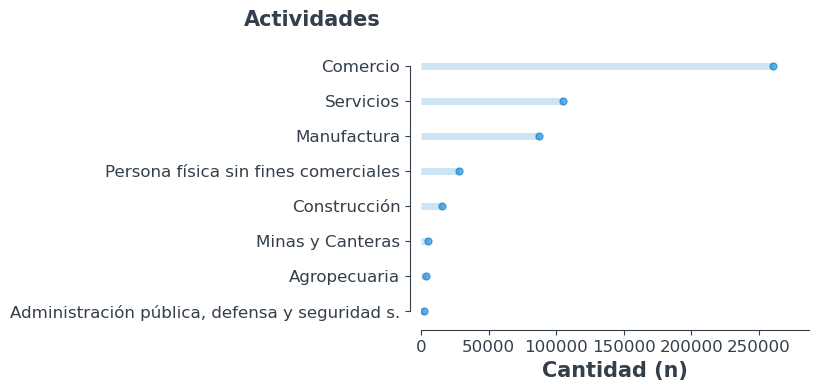

In [77]:
xlabel = 'Cantidad (n)'
ylabel = 'Actividades'

# Spliting data for x and y.
names = act.index
values = act['count']
lim = values[-1] * 1.1

# Setting font
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.sans-serif'] = 'DejaVu Sans'

# Set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

# Numeric placeholder for the y axis
my_range=list(range(1, len(act.index)+1))

fig, ax = plt.subplots(figsize=(5,3.5))

# Create for each expense type an horizontal line that starts at x = 0 with the length 
# represented by the specific expense percentage value.
plt.hlines(y=my_range, xmin=0, xmax=values, color='#007ACC', alpha=0.2, linewidth=5)

# create for each expense type a dot at the level of the expense percentage value
plt.plot(values, my_range, "o", markersize=5, color='#007ACC', alpha=0.6)

# set labels
ax.set_xlabel(xlabel, fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('')

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(my_range, act.index)

# add an horizonal label for the y axis 
fig.text(-0.23, 0.96, ylabel, fontsize=15, fontweight='black', color = '#333F4B')

# change the style of the axis spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_bounds((1, len(my_range)))
ax.set_xlim(0, lim)

ax.spines['left'].set_position(('outward', 8))
ax.spines['bottom'].set_position(('outward', 5))

In [78]:
save_plot(fig, 'h2')